In [76]:
#importing libraries

import numpy as np
import h5py
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pywt

In [77]:
import os
os.getcwd()

'E:\\SRA_Groeber\\Clustering'

In [78]:
#Reading the file

filename = 'file.hdf5'
f = h5py.File("NewThermalHistories.hdf5", 'r')

In [79]:
# List all groups
list(f.keys())

['ThermalHistories']

In [80]:
# Get the data
data = f['ThermalHistories']

In [81]:
data

<HDF5 group "/ThermalHistories" (13800 members)>

In [82]:
len(data)

13800

In [83]:
for key in data.keys():
    print(key)

0
1
10
100
1000
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
1001
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
1002
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
1003
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
1004
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
1005
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
1006
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
1007
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
1008
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
1009
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
101
1010
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
1011
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
1012
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
1013
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
1014
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
1015
10150

1140
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
1141
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
1142
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
1143
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
1144
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
1145
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
1146
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
1147
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
1148
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
1149
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
115
1150
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
1151
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
1152
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
1153
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
1154
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
1155
11550
11551
1155

1275
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
1276
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
1277
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
1278
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
1279
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
128
1280
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
1281
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
1282
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
1283
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
1284
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
1285
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
1286
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
1287
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
1288
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
1289
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
129
1290
12900
12901


1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
169
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
17
170
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
171
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
172
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
173
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
174
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
175
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
176
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
177
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
178
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
179
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
18
180
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
181
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
182
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
183
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
184
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
185
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
186
1860
1861
1862
1863
18

348
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
349
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
35
350
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
351
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
352
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
353
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
354
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
355
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
356
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
357
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
358
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
359
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
36
360
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
361
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
362
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
363
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
364
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
365
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
366
3660
3661
3662
366

528
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
529
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
53
530
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
531
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
532
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
533
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
534
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
535
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
536
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
537
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
538
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
539
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
54
540
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
541
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
542
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
543
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
544
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
545
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
546
5460
5461
5462
546

7079
708
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
709
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
71
710
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
711
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
712
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
713
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
714
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
715
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
716
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
717
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
718
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
719
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
72
720
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
721
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
722
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
723
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
724
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
725
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
726
7260
7261
726

888
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
89
890
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
891
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
892
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
893
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
894
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
895
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
896
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
897
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
898
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
899
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9
90
900
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
901
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
902
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
903
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
904
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
905
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
906
9060
9061
9062
9

In [84]:
for key in data.keys():
    print(data[key])
    

<HDF5 dataset "0": shape (1,), type "<f4">
<HDF5 dataset "1": shape (1,), type "<f4">
<HDF5 dataset "10": shape (1,), type "<f4">
<HDF5 dataset "100": shape (1497,), type "<f4">
<HDF5 dataset "1000": shape (1,), type "<f4">
<HDF5 dataset "10000": shape (1,), type "<f4">
<HDF5 dataset "10001": shape (1,), type "<f4">
<HDF5 dataset "10002": shape (1,), type "<f4">
<HDF5 dataset "10003": shape (1,), type "<f4">
<HDF5 dataset "10004": shape (1,), type "<f4">
<HDF5 dataset "10005": shape (1,), type "<f4">
<HDF5 dataset "10006": shape (1,), type "<f4">
<HDF5 dataset "10007": shape (1,), type "<f4">
<HDF5 dataset "10008": shape (1,), type "<f4">
<HDF5 dataset "10009": shape (1,), type "<f4">
<HDF5 dataset "1001": shape (1,), type "<f4">
<HDF5 dataset "10010": shape (1,), type "<f4">
<HDF5 dataset "10011": shape (1,), type "<f4">
<HDF5 dataset "10012": shape (1,), type "<f4">
<HDF5 dataset "10013": shape (1011,), type "<f4">
<HDF5 dataset "10014": shape (1073,), type "<f4">
<HDF5 dataset "1001

<HDF5 dataset "10220": shape (1,), type "<f4">
<HDF5 dataset "10221": shape (1,), type "<f4">
<HDF5 dataset "10222": shape (1,), type "<f4">
<HDF5 dataset "10223": shape (1,), type "<f4">
<HDF5 dataset "10224": shape (1,), type "<f4">
<HDF5 dataset "10225": shape (1,), type "<f4">
<HDF5 dataset "10226": shape (1,), type "<f4">
<HDF5 dataset "10227": shape (1,), type "<f4">
<HDF5 dataset "10228": shape (1,), type "<f4">
<HDF5 dataset "10229": shape (1,), type "<f4">
<HDF5 dataset "1023": shape (1,), type "<f4">
<HDF5 dataset "10230": shape (1,), type "<f4">
<HDF5 dataset "10231": shape (1,), type "<f4">
<HDF5 dataset "10232": shape (1,), type "<f4">
<HDF5 dataset "10233": shape (1,), type "<f4">
<HDF5 dataset "10234": shape (1,), type "<f4">
<HDF5 dataset "10235": shape (1,), type "<f4">
<HDF5 dataset "10236": shape (1,), type "<f4">
<HDF5 dataset "10237": shape (1,), type "<f4">
<HDF5 dataset "10238": shape (1,), type "<f4">
<HDF5 dataset "10239": shape (1,), type "<f4">
<HDF5 dataset 

<HDF5 dataset "10671": shape (1014,), type "<f4">
<HDF5 dataset "10672": shape (1,), type "<f4">
<HDF5 dataset "10673": shape (1,), type "<f4">
<HDF5 dataset "10674": shape (1,), type "<f4">
<HDF5 dataset "10675": shape (1,), type "<f4">
<HDF5 dataset "10676": shape (1,), type "<f4">
<HDF5 dataset "10677": shape (1,), type "<f4">
<HDF5 dataset "10678": shape (1,), type "<f4">
<HDF5 dataset "10679": shape (1,), type "<f4">
<HDF5 dataset "1068": shape (1392,), type "<f4">
<HDF5 dataset "10680": shape (1,), type "<f4">
<HDF5 dataset "10681": shape (1,), type "<f4">
<HDF5 dataset "10682": shape (1,), type "<f4">
<HDF5 dataset "10683": shape (1,), type "<f4">
<HDF5 dataset "10684": shape (1,), type "<f4">
<HDF5 dataset "10685": shape (1,), type "<f4">
<HDF5 dataset "10686": shape (1,), type "<f4">
<HDF5 dataset "10687": shape (1,), type "<f4">
<HDF5 dataset "10688": shape (1,), type "<f4">
<HDF5 dataset "10689": shape (1,), type "<f4">
<HDF5 dataset "1069": shape (1358,), type "<f4">
<HDF5 

<HDF5 dataset "10991": shape (2106,), type "<f4">
<HDF5 dataset "10992": shape (2139,), type "<f4">
<HDF5 dataset "10993": shape (2207,), type "<f4">
<HDF5 dataset "10994": shape (2240,), type "<f4">
<HDF5 dataset "10995": shape (2306,), type "<f4">
<HDF5 dataset "10996": shape (2340,), type "<f4">
<HDF5 dataset "10997": shape (2402,), type "<f4">
<HDF5 dataset "10998": shape (2374,), type "<f4">
<HDF5 dataset "10999": shape (2401,), type "<f4">
<HDF5 dataset "11": shape (1,), type "<f4">
<HDF5 dataset "110": shape (1300,), type "<f4">
<HDF5 dataset "1100": shape (1,), type "<f4">
<HDF5 dataset "11000": shape (2374,), type "<f4">
<HDF5 dataset "11001": shape (2398,), type "<f4">
<HDF5 dataset "11002": shape (2374,), type "<f4">
<HDF5 dataset "11003": shape (2396,), type "<f4">
<HDF5 dataset "11004": shape (2374,), type "<f4">
<HDF5 dataset "11005": shape (2381,), type "<f4">
<HDF5 dataset "11006": shape (2323,), type "<f4">
<HDF5 dataset "11007": shape (2283,), type "<f4">
<HDF5 datase

<HDF5 dataset "11500": shape (1575,), type "<f4">
<HDF5 dataset "11501": shape (1479,), type "<f4">
<HDF5 dataset "11502": shape (1415,), type "<f4">
<HDF5 dataset "11503": shape (1376,), type "<f4">
<HDF5 dataset "11504": shape (1312,), type "<f4">
<HDF5 dataset "11505": shape (1271,), type "<f4">
<HDF5 dataset "11506": shape (1208,), type "<f4">
<HDF5 dataset "11507": shape (1168,), type "<f4">
<HDF5 dataset "11508": shape (1104,), type "<f4">
<HDF5 dataset "11509": shape (1061,), type "<f4">
<HDF5 dataset "1151": shape (2547,), type "<f4">
<HDF5 dataset "11510": shape (1010,), type "<f4">
<HDF5 dataset "11511": shape (1,), type "<f4">
<HDF5 dataset "11512": shape (1,), type "<f4">
<HDF5 dataset "11513": shape (1,), type "<f4">
<HDF5 dataset "11514": shape (1,), type "<f4">
<HDF5 dataset "11515": shape (1,), type "<f4">
<HDF5 dataset "11516": shape (1,), type "<f4">
<HDF5 dataset "11517": shape (1,), type "<f4">
<HDF5 dataset "11518": shape (1,), type "<f4">
<HDF5 dataset "11519": sh

<HDF5 dataset "122": shape (1,), type "<f4">
<HDF5 dataset "1220": shape (1,), type "<f4">
<HDF5 dataset "12200": shape (2350,), type "<f4">
<HDF5 dataset "12201": shape (2420,), type "<f4">
<HDF5 dataset "12202": shape (2350,), type "<f4">
<HDF5 dataset "12203": shape (2406,), type "<f4">
<HDF5 dataset "12204": shape (2320,), type "<f4">
<HDF5 dataset "12205": shape (2303,), type "<f4">
<HDF5 dataset "12206": shape (2218,), type "<f4">
<HDF5 dataset "12207": shape (2201,), type "<f4">
<HDF5 dataset "12208": shape (2117,), type "<f4">
<HDF5 dataset "12209": shape (2098,), type "<f4">
<HDF5 dataset "1221": shape (1,), type "<f4">
<HDF5 dataset "12210": shape (2015,), type "<f4">
<HDF5 dataset "12211": shape (1995,), type "<f4">
<HDF5 dataset "12212": shape (1913,), type "<f4">
<HDF5 dataset "12213": shape (1892,), type "<f4">
<HDF5 dataset "12214": shape (1811,), type "<f4">
<HDF5 dataset "12215": shape (1789,), type "<f4">
<HDF5 dataset "12216": shape (1692,), type "<f4">
<HDF5 dataset

<HDF5 dataset "12469": shape (1,), type "<f4">
<HDF5 dataset "1247": shape (1,), type "<f4">
<HDF5 dataset "12470": shape (1,), type "<f4">
<HDF5 dataset "12471": shape (1,), type "<f4">
<HDF5 dataset "12472": shape (1,), type "<f4">
<HDF5 dataset "12473": shape (1,), type "<f4">
<HDF5 dataset "12474": shape (1,), type "<f4">
<HDF5 dataset "12475": shape (1,), type "<f4">
<HDF5 dataset "12476": shape (1,), type "<f4">
<HDF5 dataset "12477": shape (1,), type "<f4">
<HDF5 dataset "12478": shape (1,), type "<f4">
<HDF5 dataset "12479": shape (1,), type "<f4">
<HDF5 dataset "1248": shape (1,), type "<f4">
<HDF5 dataset "12480": shape (1,), type "<f4">
<HDF5 dataset "12481": shape (1,), type "<f4">
<HDF5 dataset "12482": shape (1,), type "<f4">
<HDF5 dataset "12483": shape (1,), type "<f4">
<HDF5 dataset "12484": shape (1,), type "<f4">
<HDF5 dataset "12485": shape (1,), type "<f4">
<HDF5 dataset "12486": shape (1,), type "<f4">
<HDF5 dataset "12487": shape (1,), type "<f4">
<HDF5 dataset "

<HDF5 dataset "12919": shape (2335,), type "<f4">
<HDF5 dataset "1292": shape (4186,), type "<f4">
<HDF5 dataset "12920": shape (2420,), type "<f4">
<HDF5 dataset "12921": shape (2335,), type "<f4">
<HDF5 dataset "12922": shape (2408,), type "<f4">
<HDF5 dataset "12923": shape (2312,), type "<f4">
<HDF5 dataset "12924": shape (2306,), type "<f4">
<HDF5 dataset "12925": shape (2211,), type "<f4">
<HDF5 dataset "12926": shape (2204,), type "<f4">
<HDF5 dataset "12927": shape (2109,), type "<f4">
<HDF5 dataset "12928": shape (2102,), type "<f4">
<HDF5 dataset "12929": shape (2007,), type "<f4">
<HDF5 dataset "1293": shape (4204,), type "<f4">
<HDF5 dataset "12930": shape (2000,), type "<f4">
<HDF5 dataset "12931": shape (1904,), type "<f4">
<HDF5 dataset "12932": shape (1807,), type "<f4">
<HDF5 dataset "12933": shape (1796,), type "<f4">
<HDF5 dataset "12934": shape (1706,), type "<f4">
<HDF5 dataset "12935": shape (1695,), type "<f4">
<HDF5 dataset "12936": shape (1605,), type "<f4">
<H

<HDF5 dataset "13346": shape (1,), type "<f4">
<HDF5 dataset "13347": shape (1,), type "<f4">
<HDF5 dataset "13348": shape (1,), type "<f4">
<HDF5 dataset "13349": shape (1,), type "<f4">
<HDF5 dataset "1335": shape (1,), type "<f4">
<HDF5 dataset "13350": shape (1,), type "<f4">
<HDF5 dataset "13351": shape (1,), type "<f4">
<HDF5 dataset "13352": shape (1,), type "<f4">
<HDF5 dataset "13353": shape (1,), type "<f4">
<HDF5 dataset "13354": shape (1,), type "<f4">
<HDF5 dataset "13355": shape (1,), type "<f4">
<HDF5 dataset "13356": shape (1,), type "<f4">
<HDF5 dataset "13357": shape (1,), type "<f4">
<HDF5 dataset "13358": shape (1,), type "<f4">
<HDF5 dataset "13359": shape (1,), type "<f4">
<HDF5 dataset "1336": shape (1,), type "<f4">
<HDF5 dataset "13360": shape (1,), type "<f4">
<HDF5 dataset "13361": shape (1,), type "<f4">
<HDF5 dataset "13362": shape (1,), type "<f4">
<HDF5 dataset "13363": shape (1,), type "<f4">
<HDF5 dataset "13364": shape (1,), type "<f4">
<HDF5 dataset "

<HDF5 dataset "1399": shape (3211,), type "<f4">
<HDF5 dataset "14": shape (1,), type "<f4">
<HDF5 dataset "140": shape (1,), type "<f4">
<HDF5 dataset "1400": shape (3342,), type "<f4">
<HDF5 dataset "1401": shape (3371,), type "<f4">
<HDF5 dataset "1402": shape (3502,), type "<f4">
<HDF5 dataset "1403": shape (3528,), type "<f4">
<HDF5 dataset "1404": shape (3662,), type "<f4">
<HDF5 dataset "1405": shape (3686,), type "<f4">
<HDF5 dataset "1406": shape (3823,), type "<f4">
<HDF5 dataset "1407": shape (3847,), type "<f4">
<HDF5 dataset "1408": shape (3982,), type "<f4">
<HDF5 dataset "1409": shape (4001,), type "<f4">
<HDF5 dataset "141": shape (1,), type "<f4">
<HDF5 dataset "1410": shape (4031,), type "<f4">
<HDF5 dataset "1411": shape (4160,), type "<f4">
<HDF5 dataset "1412": shape (4191,), type "<f4">
<HDF5 dataset "1413": shape (4340,), type "<f4">
<HDF5 dataset "1414": shape (4362,), type "<f4">
<HDF5 dataset "1415": shape (4500,), type "<f4">
<HDF5 dataset "1416": shape (4523

<HDF5 dataset "1731": shape (1,), type "<f4">
<HDF5 dataset "1732": shape (1,), type "<f4">
<HDF5 dataset "1733": shape (1,), type "<f4">
<HDF5 dataset "1734": shape (1,), type "<f4">
<HDF5 dataset "1735": shape (1,), type "<f4">
<HDF5 dataset "1736": shape (1,), type "<f4">
<HDF5 dataset "1737": shape (1,), type "<f4">
<HDF5 dataset "1738": shape (1,), type "<f4">
<HDF5 dataset "1739": shape (1,), type "<f4">
<HDF5 dataset "174": shape (1,), type "<f4">
<HDF5 dataset "1740": shape (1,), type "<f4">
<HDF5 dataset "1741": shape (1,), type "<f4">
<HDF5 dataset "1742": shape (1,), type "<f4">
<HDF5 dataset "1743": shape (1,), type "<f4">
<HDF5 dataset "1744": shape (1,), type "<f4">
<HDF5 dataset "1745": shape (2222,), type "<f4">
<HDF5 dataset "1746": shape (2341,), type "<f4">
<HDF5 dataset "1747": shape (2380,), type "<f4">
<HDF5 dataset "1748": shape (2500,), type "<f4">
<HDF5 dataset "1749": shape (2538,), type "<f4">
<HDF5 dataset "175": shape (1,), type "<f4">
<HDF5 dataset "1750":

<HDF5 dataset "2298": shape (1,), type "<f4">
<HDF5 dataset "2299": shape (1,), type "<f4">
<HDF5 dataset "23": shape (1,), type "<f4">
<HDF5 dataset "230": shape (1301,), type "<f4">
<HDF5 dataset "2300": shape (1,), type "<f4">
<HDF5 dataset "2301": shape (1,), type "<f4">
<HDF5 dataset "2302": shape (1,), type "<f4">
<HDF5 dataset "2303": shape (1,), type "<f4">
<HDF5 dataset "2304": shape (1,), type "<f4">
<HDF5 dataset "2305": shape (1,), type "<f4">
<HDF5 dataset "2306": shape (1,), type "<f4">
<HDF5 dataset "2307": shape (1,), type "<f4">
<HDF5 dataset "2308": shape (1,), type "<f4">
<HDF5 dataset "2309": shape (1,), type "<f4">
<HDF5 dataset "231": shape (1265,), type "<f4">
<HDF5 dataset "2310": shape (1,), type "<f4">
<HDF5 dataset "2311": shape (1,), type "<f4">
<HDF5 dataset "2312": shape (1,), type "<f4">
<HDF5 dataset "2313": shape (1,), type "<f4">
<HDF5 dataset "2314": shape (1,), type "<f4">
<HDF5 dataset "2315": shape (1,), type "<f4">
<HDF5 dataset "2316": shape (1,)

<HDF5 dataset "2458": shape (1,), type "<f4">
<HDF5 dataset "2459": shape (1,), type "<f4">
<HDF5 dataset "246": shape (1,), type "<f4">
<HDF5 dataset "2460": shape (1,), type "<f4">
<HDF5 dataset "2461": shape (1,), type "<f4">
<HDF5 dataset "2462": shape (1,), type "<f4">
<HDF5 dataset "2463": shape (1,), type "<f4">
<HDF5 dataset "2464": shape (1009,), type "<f4">
<HDF5 dataset "2465": shape (2329,), type "<f4">
<HDF5 dataset "2466": shape (2352,), type "<f4">
<HDF5 dataset "2467": shape (2488,), type "<f4">
<HDF5 dataset "2468": shape (2511,), type "<f4">
<HDF5 dataset "2469": shape (2649,), type "<f4">
<HDF5 dataset "247": shape (1,), type "<f4">
<HDF5 dataset "2470": shape (2672,), type "<f4">
<HDF5 dataset "2471": shape (2808,), type "<f4">
<HDF5 dataset "2472": shape (2864,), type "<f4">
<HDF5 dataset "2473": shape (2973,), type "<f4">
<HDF5 dataset "2474": shape (3022,), type "<f4">
<HDF5 dataset "2475": shape (3132,), type "<f4">
<HDF5 dataset "2476": shape (3182,), type "<f4

<HDF5 dataset "3197": shape (3360,), type "<f4">
<HDF5 dataset "3198": shape (3422,), type "<f4">
<HDF5 dataset "3199": shape (3521,), type "<f4">
<HDF5 dataset "32": shape (1,), type "<f4">
<HDF5 dataset "320": shape (1300,), type "<f4">
<HDF5 dataset "3200": shape (3585,), type "<f4">
<HDF5 dataset "3201": shape (3715,), type "<f4">
<HDF5 dataset "3202": shape (3745,), type "<f4">
<HDF5 dataset "3203": shape (3876,), type "<f4">
<HDF5 dataset "3204": shape (3939,), type "<f4">
<HDF5 dataset "3205": shape (4040,), type "<f4">
<HDF5 dataset "3206": shape (4099,), type "<f4">
<HDF5 dataset "3207": shape (4201,), type "<f4">
<HDF5 dataset "3208": shape (4259,), type "<f4">
<HDF5 dataset "3209": shape (4362,), type "<f4">
<HDF5 dataset "321": shape (1308,), type "<f4">
<HDF5 dataset "3210": shape (4423,), type "<f4">
<HDF5 dataset "3211": shape (4557,), type "<f4">
<HDF5 dataset "3212": shape (4677,), type "<f4">
<HDF5 dataset "3213": shape (4731,), type "<f4">
<HDF5 dataset "3214": shape

<HDF5 dataset "4096": shape (1381,), type "<f4">
<HDF5 dataset "4097": shape (1408,), type "<f4">
<HDF5 dataset "4098": shape (1411,), type "<f4">
<HDF5 dataset "4099": shape (1436,), type "<f4">
<HDF5 dataset "41": shape (1,), type "<f4">
<HDF5 dataset "410": shape (1,), type "<f4">
<HDF5 dataset "4100": shape (1436,), type "<f4">
<HDF5 dataset "4101": shape (1436,), type "<f4">
<HDF5 dataset "4102": shape (1436,), type "<f4">
<HDF5 dataset "4103": shape (1436,), type "<f4">
<HDF5 dataset "4104": shape (1430,), type "<f4">
<HDF5 dataset "4105": shape (1404,), type "<f4">
<HDF5 dataset "4106": shape (1404,), type "<f4">
<HDF5 dataset "4107": shape (1404,), type "<f4">
<HDF5 dataset "4108": shape (1403,), type "<f4">
<HDF5 dataset "4109": shape (1403,), type "<f4">
<HDF5 dataset "411": shape (1,), type "<f4">
<HDF5 dataset "4110": shape (1403,), type "<f4">
<HDF5 dataset "4111": shape (1376,), type "<f4">
<HDF5 dataset "4112": shape (1398,), type "<f4">
<HDF5 dataset "4113": shape (1376

<HDF5 dataset "4997": shape (2198,), type "<f4">
<HDF5 dataset "4998": shape (2250,), type "<f4">
<HDF5 dataset "4999": shape (2276,), type "<f4">
<HDF5 dataset "5": shape (1,), type "<f4">
<HDF5 dataset "50": shape (1,), type "<f4">
<HDF5 dataset "500": shape (1,), type "<f4">
<HDF5 dataset "5000": shape (2309,), type "<f4">
<HDF5 dataset "5001": shape (2360,), type "<f4">
<HDF5 dataset "5002": shape (2393,), type "<f4">
<HDF5 dataset "5003": shape (2431,), type "<f4">
<HDF5 dataset "5004": shape (2490,), type "<f4">
<HDF5 dataset "5005": shape (2545,), type "<f4">
<HDF5 dataset "5006": shape (2605,), type "<f4">
<HDF5 dataset "5007": shape (2599,), type "<f4">
<HDF5 dataset "5008": shape (2606,), type "<f4">
<HDF5 dataset "5009": shape (2597,), type "<f4">
<HDF5 dataset "501": shape (1,), type "<f4">
<HDF5 dataset "5010": shape (2655,), type "<f4">
<HDF5 dataset "5011": shape (2657,), type "<f4">
<HDF5 dataset "5012": shape (2657,), type "<f4">
<HDF5 dataset "5013": shape (2657,), ty

<HDF5 dataset "5896": shape (1439,), type "<f4">
<HDF5 dataset "5897": shape (1463,), type "<f4">
<HDF5 dataset "5898": shape (1451,), type "<f4">
<HDF5 dataset "5899": shape (1463,), type "<f4">
<HDF5 dataset "59": shape (1,), type "<f4">
<HDF5 dataset "590": shape (1312,), type "<f4">
<HDF5 dataset "5900": shape (1474,), type "<f4">
<HDF5 dataset "5901": shape (1471,), type "<f4">
<HDF5 dataset "5902": shape (1474,), type "<f4">
<HDF5 dataset "5903": shape (1473,), type "<f4">
<HDF5 dataset "5904": shape (1473,), type "<f4">
<HDF5 dataset "5905": shape (1473,), type "<f4">
<HDF5 dataset "5906": shape (1473,), type "<f4">
<HDF5 dataset "5907": shape (1473,), type "<f4">
<HDF5 dataset "5908": shape (1473,), type "<f4">
<HDF5 dataset "5909": shape (1475,), type "<f4">
<HDF5 dataset "591": shape (1305,), type "<f4">
<HDF5 dataset "5910": shape (1472,), type "<f4">
<HDF5 dataset "5911": shape (1456,), type "<f4">
<HDF5 dataset "5912": shape (1463,), type "<f4">
<HDF5 dataset "5913": shape

<HDF5 dataset "6796": shape (5063,), type "<f4">
<HDF5 dataset "6797": shape (5050,), type "<f4">
<HDF5 dataset "6798": shape (5029,), type "<f4">
<HDF5 dataset "6799": shape (5015,), type "<f4">
<HDF5 dataset "68": shape (1015,), type "<f4">
<HDF5 dataset "680": shape (2843,), type "<f4">
<HDF5 dataset "6800": shape (4995,), type "<f4">
<HDF5 dataset "6801": shape (4914,), type "<f4">
<HDF5 dataset "6802": shape (4798,), type "<f4">
<HDF5 dataset "6803": shape (4738,), type "<f4">
<HDF5 dataset "6804": shape (4614,), type "<f4">
<HDF5 dataset "6805": shape (4517,), type "<f4">
<HDF5 dataset "6806": shape (4387,), type "<f4">
<HDF5 dataset "6807": shape (4201,), type "<f4">
<HDF5 dataset "6808": shape (4166,), type "<f4">
<HDF5 dataset "6809": shape (3982,), type "<f4">
<HDF5 dataset "681": shape (2882,), type "<f4">
<HDF5 dataset "6810": shape (3850,), type "<f4">
<HDF5 dataset "6811": shape (3756,), type "<f4">
<HDF5 dataset "6812": shape (3628,), type "<f4">
<HDF5 dataset "6813": sh

<HDF5 dataset "7695": shape (1,), type "<f4">
<HDF5 dataset "7696": shape (1,), type "<f4">
<HDF5 dataset "7697": shape (1,), type "<f4">
<HDF5 dataset "7698": shape (1,), type "<f4">
<HDF5 dataset "7699": shape (1,), type "<f4">
<HDF5 dataset "77": shape (1218,), type "<f4">
<HDF5 dataset "770": shape (1,), type "<f4">
<HDF5 dataset "7700": shape (1,), type "<f4">
<HDF5 dataset "7701": shape (1,), type "<f4">
<HDF5 dataset "7702": shape (1,), type "<f4">
<HDF5 dataset "7703": shape (1,), type "<f4">
<HDF5 dataset "7704": shape (1,), type "<f4">
<HDF5 dataset "7705": shape (1,), type "<f4">
<HDF5 dataset "7706": shape (1,), type "<f4">
<HDF5 dataset "7707": shape (1,), type "<f4">
<HDF5 dataset "7708": shape (1036,), type "<f4">
<HDF5 dataset "7709": shape (1075,), type "<f4">
<HDF5 dataset "771": shape (1,), type "<f4">
<HDF5 dataset "7710": shape (1104,), type "<f4">
<HDF5 dataset "7711": shape (1137,), type "<f4">
<HDF5 dataset "7712": shape (1163,), type "<f4">
<HDF5 dataset "7713"

<HDF5 dataset "8595": shape (4886,), type "<f4">
<HDF5 dataset "8596": shape (4886,), type "<f4">
<HDF5 dataset "8597": shape (4885,), type "<f4">
<HDF5 dataset "8598": shape (4884,), type "<f4">
<HDF5 dataset "8599": shape (4881,), type "<f4">
<HDF5 dataset "86": shape (1387,), type "<f4">
<HDF5 dataset "860": shape (1,), type "<f4">
<HDF5 dataset "8600": shape (4875,), type "<f4">
<HDF5 dataset "8601": shape (4724,), type "<f4">
<HDF5 dataset "8602": shape (4700,), type "<f4">
<HDF5 dataset "8603": shape (4503,), type "<f4">
<HDF5 dataset "8604": shape (4480,), type "<f4">
<HDF5 dataset "8605": shape (4283,), type "<f4">
<HDF5 dataset "8606": shape (4260,), type "<f4">
<HDF5 dataset "8607": shape (4062,), type "<f4">
<HDF5 dataset "8608": shape (4040,), type "<f4">
<HDF5 dataset "8609": shape (3842,), type "<f4">
<HDF5 dataset "861": shape (1,), type "<f4">
<HDF5 dataset "8610": shape (3821,), type "<f4">
<HDF5 dataset "8611": shape (3621,), type "<f4">
<HDF5 dataset "8612": shape (3

<HDF5 dataset "9494": shape (1,), type "<f4">
<HDF5 dataset "9495": shape (1,), type "<f4">
<HDF5 dataset "9496": shape (1,), type "<f4">
<HDF5 dataset "9497": shape (1,), type "<f4">
<HDF5 dataset "9498": shape (1,), type "<f4">
<HDF5 dataset "9499": shape (1,), type "<f4">
<HDF5 dataset "95": shape (1502,), type "<f4">
<HDF5 dataset "950": shape (1350,), type "<f4">
<HDF5 dataset "9500": shape (1,), type "<f4">
<HDF5 dataset "9501": shape (1,), type "<f4">
<HDF5 dataset "9502": shape (1,), type "<f4">
<HDF5 dataset "9503": shape (1,), type "<f4">
<HDF5 dataset "9504": shape (1,), type "<f4">
<HDF5 dataset "9505": shape (1,), type "<f4">
<HDF5 dataset "9506": shape (1,), type "<f4">
<HDF5 dataset "9507": shape (1,), type "<f4">
<HDF5 dataset "9508": shape (1,), type "<f4">
<HDF5 dataset "9509": shape (1,), type "<f4">
<HDF5 dataset "951": shape (1314,), type "<f4">
<HDF5 dataset "9510": shape (1,), type "<f4">
<HDF5 dataset "9511": shape (1,), type "<f4">
<HDF5 dataset "9512": shape (

In [85]:
data['100']

<HDF5 dataset "100": shape (1497,), type "<f4">

In [86]:
X=[None]*13800

In [87]:
for key in data.keys():
    X[int(key)]=data[key]

In [88]:
X

[<HDF5 dataset "0": shape (1,), type "<f4">,
 <HDF5 dataset "1": shape (1,), type "<f4">,
 <HDF5 dataset "2": shape (1,), type "<f4">,
 <HDF5 dataset "3": shape (1,), type "<f4">,
 <HDF5 dataset "4": shape (1,), type "<f4">,
 <HDF5 dataset "5": shape (1,), type "<f4">,
 <HDF5 dataset "6": shape (1,), type "<f4">,
 <HDF5 dataset "7": shape (1,), type "<f4">,
 <HDF5 dataset "8": shape (1,), type "<f4">,
 <HDF5 dataset "9": shape (1,), type "<f4">,
 <HDF5 dataset "10": shape (1,), type "<f4">,
 <HDF5 dataset "11": shape (1,), type "<f4">,
 <HDF5 dataset "12": shape (1,), type "<f4">,
 <HDF5 dataset "13": shape (1,), type "<f4">,
 <HDF5 dataset "14": shape (1,), type "<f4">,
 <HDF5 dataset "15": shape (1,), type "<f4">,
 <HDF5 dataset "16": shape (1,), type "<f4">,
 <HDF5 dataset "17": shape (1,), type "<f4">,
 <HDF5 dataset "18": shape (1,), type "<f4">,
 <HDF5 dataset "19": shape (1,), type "<f4">,
 <HDF5 dataset "20": shape (1,), type "<f4">,
 <HDF5 dataset "21": shape (1,), type "<f4">

In [89]:
type(X)

list

In [90]:
### To check if the index are matching

X[5516]

<HDF5 dataset "5516": shape (1201,), type "<f4">

In [91]:
max_len = max([len(i) for i in X])
print(max_len)
        

5385


In [92]:
# Seeing all images which have all entries 

for i in X:
    if(len(i)==5385):
        print(i)

<HDF5 dataset "6778": shape (5385,), type "<f4">
<HDF5 dataset "6897": shape (5385,), type "<f4">
<HDF5 dataset "7017": shape (5385,), type "<f4">
<HDF5 dataset "7137": shape (5385,), type "<f4">
<HDF5 dataset "7256": shape (5385,), type "<f4">
<HDF5 dataset "7376": shape (5385,), type "<f4">


In [93]:
# Filling the array with unequal entries with zeros

X_array = np.zeros((13800,5385))
for i,j in enumerate(X):
    X_array[i][0:len(j)] = j

In [94]:
a=[[12,2,3],[14,5,6],[17,8,9]]
a

[[12, 2, 3], [14, 5, 6], [17, 8, 9]]

In [95]:
for i in range(0,3):
    print(np.max(a[i][0:3]))

12
14
17


In [96]:
X_array.shape

(13800, 5385)

In [97]:
maxcomp=[]
for i in range(0,13800):
    maxcomp.append(np.max(X_array[i][4096:5385]))
    

In [98]:
maxcomp = np.asarray(maxcomp)
print(np.max(maxcomp))
print(np.argmax(maxcomp))
print(np.argmax(X_array[7629]))

## 7629 th image has a high value of 4837.4355 in the index of 4149. So i cannot reduce to 4096 components. In this i have reduced
## to 8192 components.

4837.435546875
7629
4149


### Increasing array size to 8192

In [106]:
# Increasing  the array size from 5385 to 8192

X_narray = np.zeros((13800,8192))
for i,j in enumerate(X_array):
    X_narray[i][0:len(j)] = j

In [107]:
X_narray.shape

(13800, 8192)

In [111]:
X_narray[6897].shape

(8192,)

## Haar Wavelet decomposition

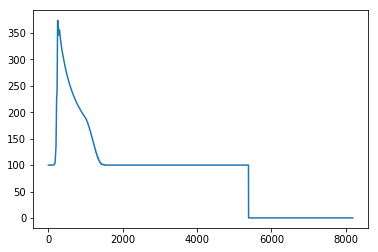

In [112]:
plt.plot(X_narray[6897])

## N=1



In [118]:
X_haar1=X_narray
for i in range(0,13):
    (X_haar1, cd) = pywt.dwt(X_haar1,'haar')


In [119]:
X_haar1.shape

(13800, 1)

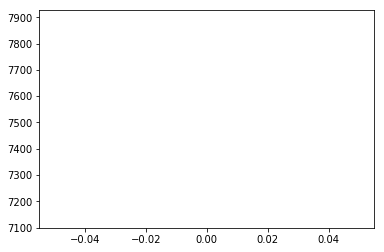

In [120]:
plt.plot(X_haar1[6897])

In [121]:
X_rec=X_haar1
for i in range(0,13):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [122]:
X_rec.shape

(13800, 8192)

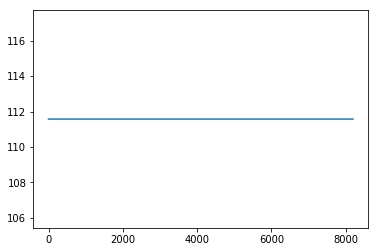

In [123]:
plt.plot(X_rec[2614]) ## Reconstructing the image from haar wavelet transform


### N=4

In [127]:
X_haar4=X_narray
for i in range(0,11):
    (X_haar4, cd) = pywt.dwt(X_haar4,'haar')


In [128]:
X_haar4.shape

(13800, 4)

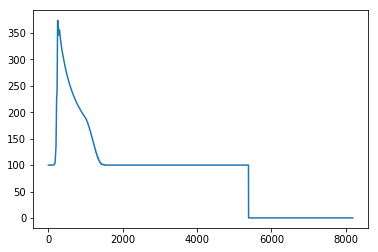

In [129]:
plt.plot(X_narray[6897])

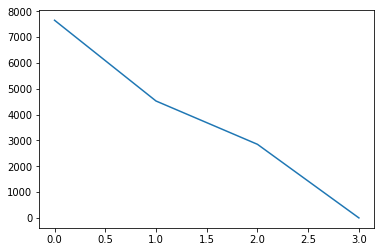

In [130]:
plt.plot(X_haar4[6897])

In [131]:
X_rec=X_haar4
for i in range(0,11):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [132]:
X_rec.shape

(13800, 8192)

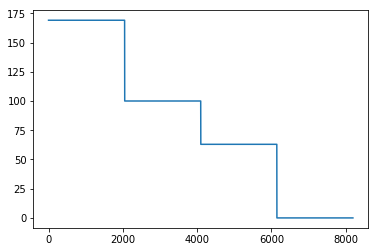

In [133]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform


### N=32

In [134]:
X_haar32 = X_narray
for i in range(0,8):
    (X_haar32, cd) = pywt.dwt(X_haar32,'haar')

In [135]:
X_haar32.shape

(13800, 32)

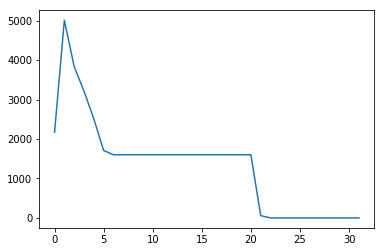

In [136]:
plt.plot(X_haar32[6897])

In [137]:
X_rec=X_haar32
for i in range(0,8):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [138]:
X_rec.shape

(13800, 8192)

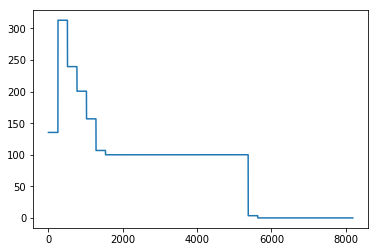

In [139]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform


### N=64

In [140]:
X_haar64 = X_narray
for i in range(0,7):
    (X_haar64, cd) = pywt.dwt(X_haar64,'haar')

In [141]:
X_haar64.shape

(13800, 64)

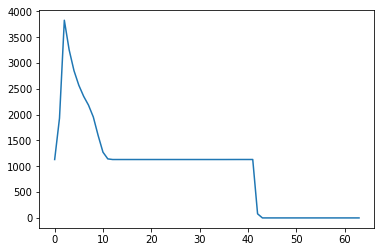

In [142]:
plt.plot(X_haar64[6897])

In [143]:
X_rec=X_haar64
for i in range(0,7):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [144]:
X_rec.shape

(13800, 8192)

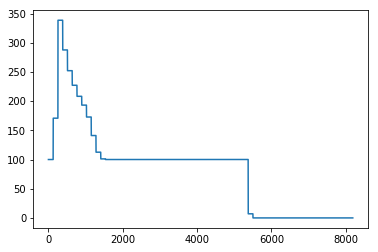

In [145]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform


### N=128

In [153]:
X_haar128 = X_narray
for i in range(0,6):
    (X_haar128, cd) = pywt.dwt(X_haar128,'haar')

In [154]:
X_haar128.shape

(13800, 128)

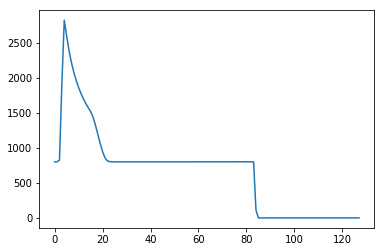

In [155]:
plt.plot(X_haar128[6897])

In [156]:
X_rec=X_haar128
for i in range(0,6):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [157]:
X_rec.shape

(13800, 8192)

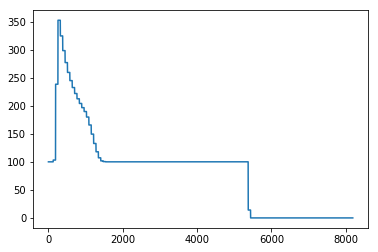

In [158]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform


### N=256

In [159]:
X_narray.shape

(13800, 8192)

In [162]:
X_haar256 = X_narray
for i in range(0,5):
    (X_haar256, cd) = pywt.dwt(X_haar256,'haar')

In [163]:
X_haar256.shape

(13800, 256)

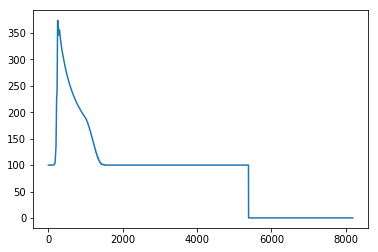

In [164]:
plt.plot(X_narray[6897])

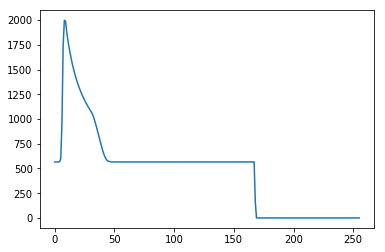

In [165]:
plt.plot(X_haar256[6897])

In [166]:
X_haar256new=X_haar256/(1.4145*1.4145*1.4145*1.4145*1.4145)

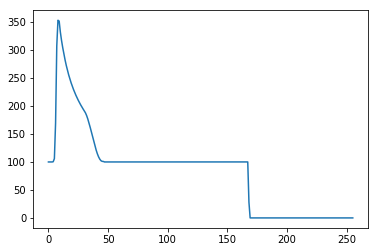

In [168]:
plt.plot(X_haar256new[6897])

In [169]:
X_rec=X_haar256
for i in range(0,5):
    X_rec= pywt.idwt(X_rec, None, 'haar' )

In [170]:
X_rec.shape

(13800, 8192)

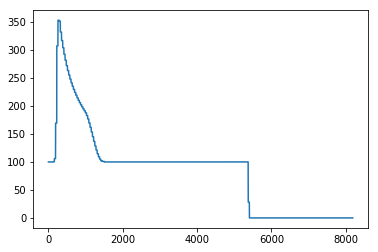

In [171]:
plt.plot(X_rec[6897]) ## Reconstructing the image from haar wavelet transform

### Choosing N=256

### K means

In [172]:
from sklearn.cluster import KMeans

In [173]:
X_haar256.shape

(13800, 256)

### Elbow method

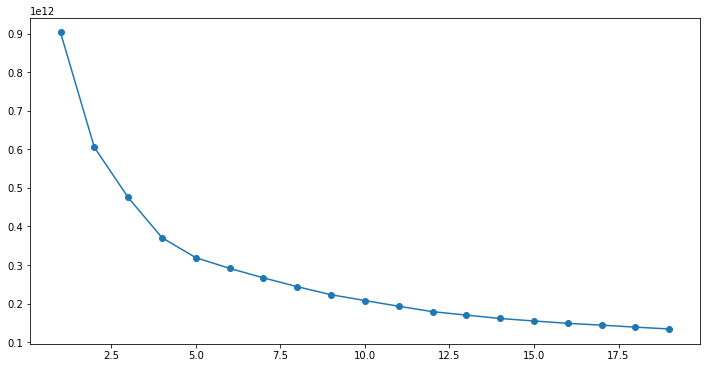

In [174]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_haar256 )
    cluster_errors.append( clusters.inertia_ )
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Choosing 3 clusters

In [260]:
# Number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=25)
# Fitting the input data
kmeans = kmeans.fit(X_haar256)
# Getting the cluster labels
labels1 = kmeans.predict(X_haar256)
# Centroid values
centroids = kmeans.cluster_centers_

#Unique labels
np.unique(labels1)

array([0, 1, 2])

In [261]:
zero=0
one=0
two=0
for i in labels1:
    if i==0:
        zero=zero+1
    elif i==1:
        one=one+1
    elif i==2:
        two=two+1

In [262]:
print("Number of entries with 0 as the label :" , zero)
print("Number of entries with 1 as the label :" , one)
print("Number of entries with 2 as the label :" , two)

Number of entries with 0 as the label : 9215
Number of entries with 1 as the label : 2853
Number of entries with 2 as the label : 1732


In [263]:
labels1.shape

(13800,)

In [264]:
df=pd.DataFrame(X_narray)
df['Labels']=labels1
df

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,Labels
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [265]:
df0 = df[df['Labels']==0] ### Labels with 0 in a dataframe
df0.shape
X_array0=df0.values
print(X_array0.shape)

df1 = df[df['Labels']==1] ### Labels with 1 in a dataframe
df1.shape
X_array1=df1.values
print(X_array1.shape)

df2 = df[df['Labels']==2] ### Labels with 2 in a dataframe
df2.shape
X_array2=df2.values
print(X_array2.shape)


(9215, 8193)
(2853, 8193)
(1732, 8193)


In [266]:
mean0=[]
sd0=[]

mean1=[]
sd1=[]

mean2=[]
sd2=[]


In [267]:
np.std(X_array0[:,1])

55.40989193174321

In [268]:
for i in range(0,8192):
    mean0.append(np.mean(X_array0[:,i]))   # Finding mean, sd for cluster 0
    sd0.append(np.std(X_array0[:,i]))
    
    mean1.append(np.mean(X_array1[:,i]))   # Finding mean, sd for cluster 1
    sd1.append(np.std(X_array1[:,i]))
    
    mean2.append(np.mean(X_array2[:,i]))   # Finding mean, sd for cluster 2
    sd2.append(np.std(X_array2[:,i]))
   
    

In [269]:
mean0=np.asarray(mean0)
sd0=np.asarray(sd0)

mean1=np.asarray(mean1)
sd1=np.asarray(sd1)

mean2=np.asarray(mean2)
sd2=np.asarray(sd2)

In [270]:
mean01=mean0+sd0
mean02=mean0-sd0

mean11=mean1+sd1
mean12=mean1-sd1

mean21=mean2+sd2
mean22=mean2-sd2

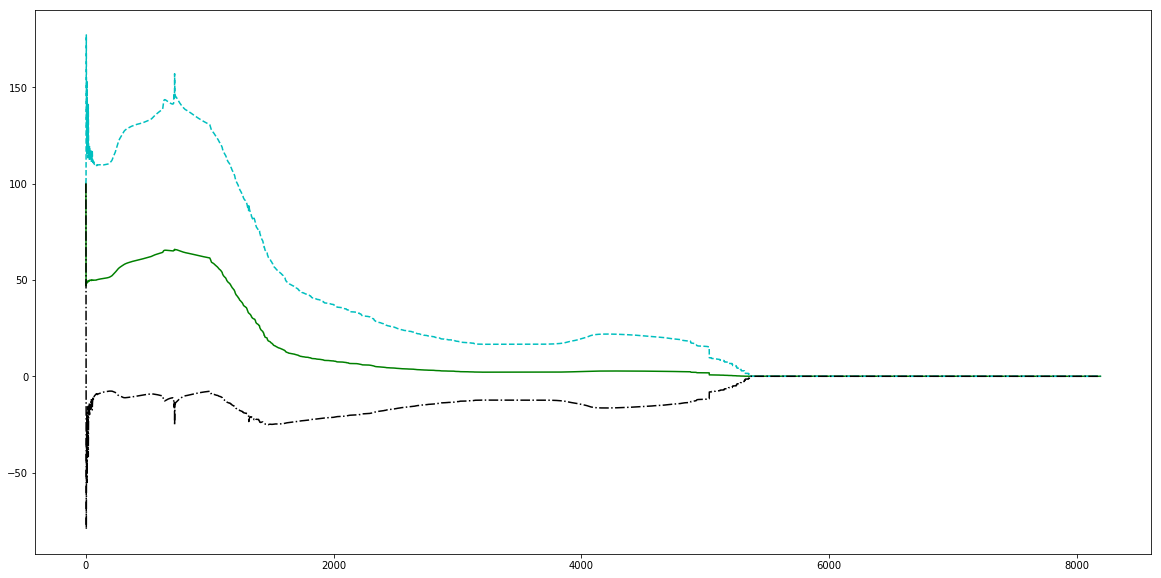

In [271]:
plt.figure(figsize=(20,10))
plt.plot(mean0, '-g')  # solid green
plt.plot(mean01, '--c') # dashed cyan
plt.plot(mean02, '-.k') # dashdot black

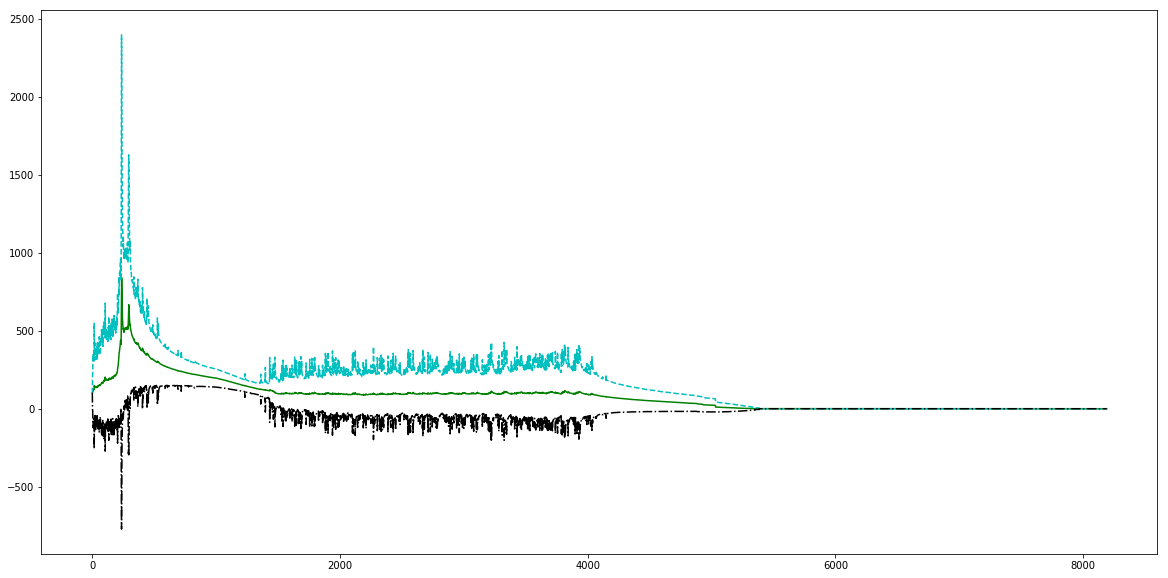

In [272]:
plt.figure(figsize=(20,10))
plt.plot(mean1, '-g')  # solid green
plt.plot(mean11, '--c') # dashed cyan
plt.plot(mean12, '-.k') # dashdot black

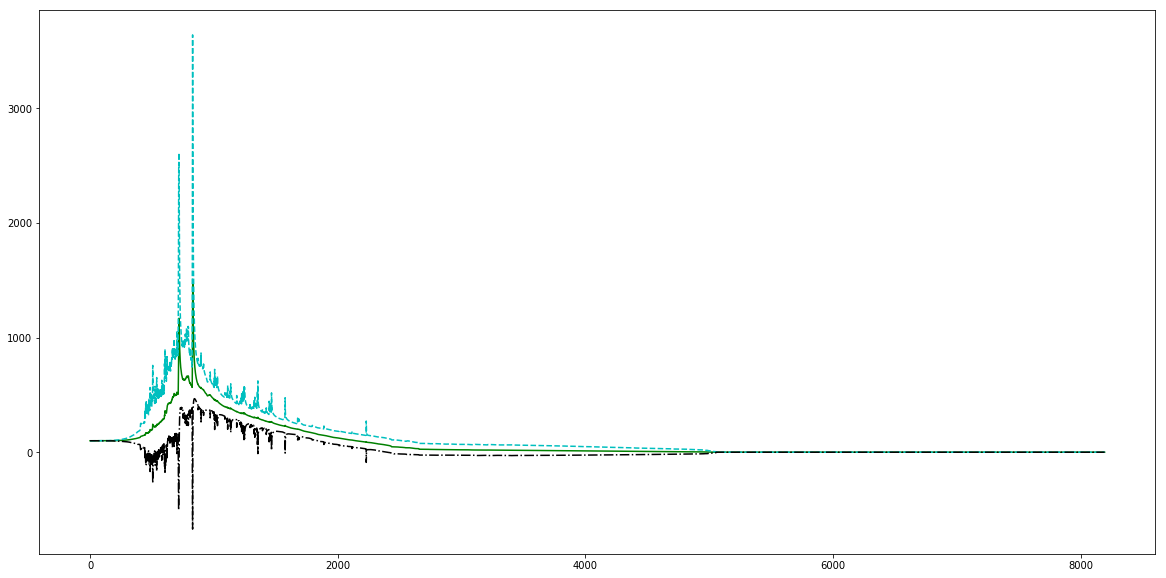

In [273]:
plt.figure(figsize=(20,10))
plt.plot(mean2, '-g')  # solid green
plt.plot(mean21, '--c') # dashed cyan
plt.plot(mean22, '-.k') # dashdot black

In [274]:
# Copying just the label values in a separate dataframe

labels_df = df['Labels']
labels_df = pd.DataFrame(labels_df)
labels_df.index.name = 'Image index'
labels_df.columns=['Labels(3clusters)']
labels_df

,Labels(3clusters)
Image index,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


### Choosing number of clusters as 5

In [275]:
# Number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=30)
# Fitting the input data
kmeans = kmeans.fit(X_haar256)
# Getting the cluster labels
labels2 = kmeans.predict(X_haar256)
# Centroid values
centroids = kmeans.cluster_centers_

#Unique labels
np.unique(labels2)

array([0, 1, 2, 3, 4])

In [276]:
zero=0
one=0
two=0
three=0
four=0
for i in labels2:
    if i==0:
        zero=zero+1
    elif i==1:
        one=one+1
    elif i==2:
        two=two+1
    elif i==3:
        three=three+1
    elif i==4:
        four=four+1

In [277]:
print("Number of entries with 0 as the label :" , zero)
print("Number of entries with 1 as the label :" , one)
print("Number of entries with 2 as the label :" , two)
print("Number of entries with 3 as the label :" , three)
print("Number of entries with 4 as the label :" , four)

Number of entries with 0 as the label : 1447
Number of entries with 1 as the label : 4451
Number of entries with 2 as the label : 4920
Number of entries with 3 as the label : 1647
Number of entries with 4 as the label : 1335


In [278]:
labels2.shape

(13800,)

In [279]:
df=pd.DataFrame(X_narray)
df['Labels2']=labels2
df

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,Labels2
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [280]:
df0 = df[df['Labels2']==0] ### Labels with 0 in a dataframe
df0.shape
X_array0=df0.values
X_array0.shape

(1447, 8193)

In [281]:
df1 = df[df['Labels2']==1] ### Labels with 1 in a dataframe
df1.shape
X_array1=df1.values
X_array1.shape

(4451, 8193)

In [282]:
df2 = df[df['Labels2']==2] ### Labels with 2 in a dataframe
df2.shape
X_array2=df2.values
X_array2.shape

(4920, 8193)

In [283]:
df3 = df[df['Labels2']==3] ### Labels with 3 in a dataframe
df3.shape
X_array3=df3.values
X_array3.shape

(1647, 8193)

In [284]:
df4 = df[df['Labels2']==4] ### Labels with 4 in a dataframe
df4.shape
X_array4=df4.values
X_array4.shape

(1335, 8193)

In [285]:
mean0=[]
sd0=[]

mean1=[]
sd1=[]

mean2=[]
sd2=[]

mean3=[]
sd3=[]

mean4=[]
sd4=[]

In [286]:
for i in range(0,8192):
    mean0.append(np.mean(X_array0[:,i]))   # Finding mean, sd for cluster 0
    sd0.append(np.std(X_array0[:,i]))
    
    mean1.append(np.mean(X_array1[:,i]))   # Finding mean, sd for cluster 1
    sd1.append(np.std(X_array1[:,i]))
    
    mean2.append(np.mean(X_array2[:,i]))   # Finding mean, sd for cluster 2
    sd2.append(np.std(X_array2[:,i]))
    
    mean3.append(np.mean(X_array3[:,i]))   # Finding mean, sd for cluster 3
    sd3.append(np.std(X_array3[:,i]))
    
    mean4.append(np.mean(X_array4[:,i]))   # Finding mean, sd for cluster 4
    sd4.append(np.std(X_array4[:,i]))
   
   
   

In [287]:
mean0=np.asarray(mean0)
sd0=np.asarray(sd0)

mean1=np.asarray(mean1)
sd1=np.asarray(sd1)

mean2=np.asarray(mean2)
sd2=np.asarray(sd2)

mean3=np.asarray(mean3)
sd3=np.asarray(sd3)

mean4=np.asarray(mean4)
sd4=np.asarray(sd4)

In [288]:
mean01=mean0+sd0
mean02=mean0-sd0

mean11=mean1+sd1
mean12=mean1-sd1

mean21=mean2+sd2
mean22=mean2-sd2

mean31=mean3+sd3
mean32=mean3-sd3

mean41=mean4+sd4
mean42=mean4-sd4

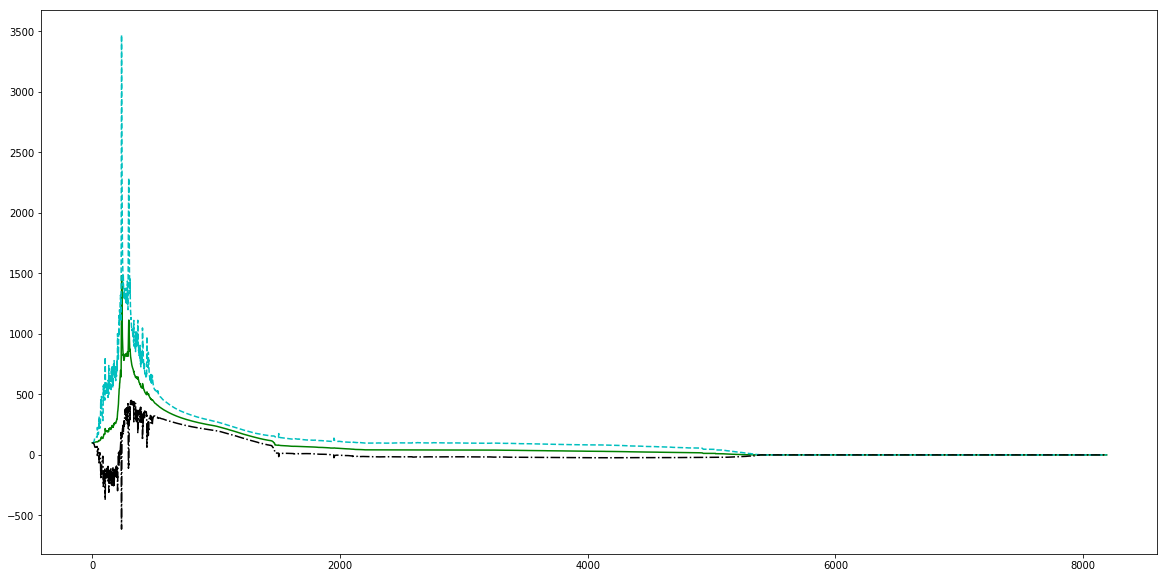

In [289]:
plt.figure(figsize=(20,10))
plt.plot(mean0, '-g')  # solid green
plt.plot(mean01, '--c') # dashed cyan
plt.plot(mean02, '-.k') # dashdot black

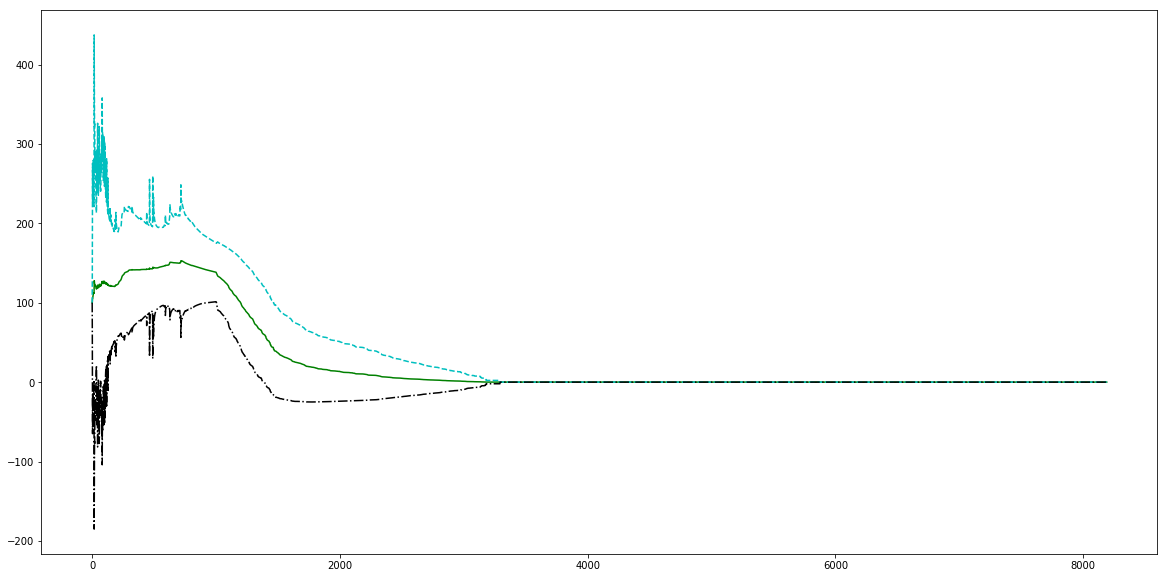

In [290]:
plt.figure(figsize=(20,10))
plt.plot(mean1, '-g')  # solid green
plt.plot(mean11, '--c') # dashed cyan
plt.plot(mean12, '-.k') # dashdot black

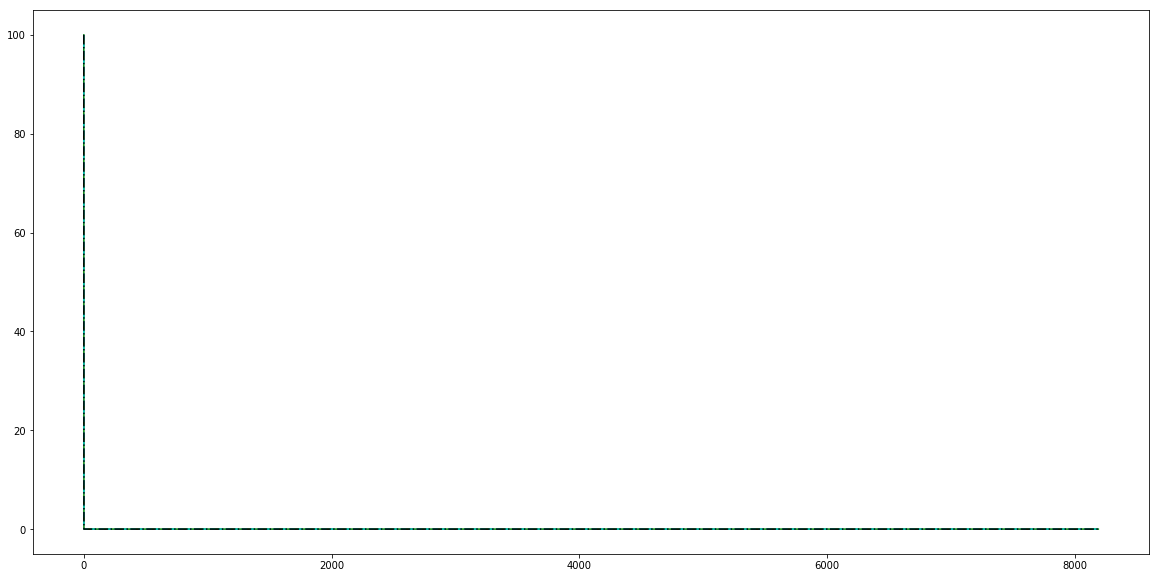

In [291]:
plt.figure(figsize=(20,10))
plt.plot(mean2, '-g')  # solid green
plt.plot(mean21, '--c') # dashed cyan
plt.plot(mean22, '-.k') # dashdot black

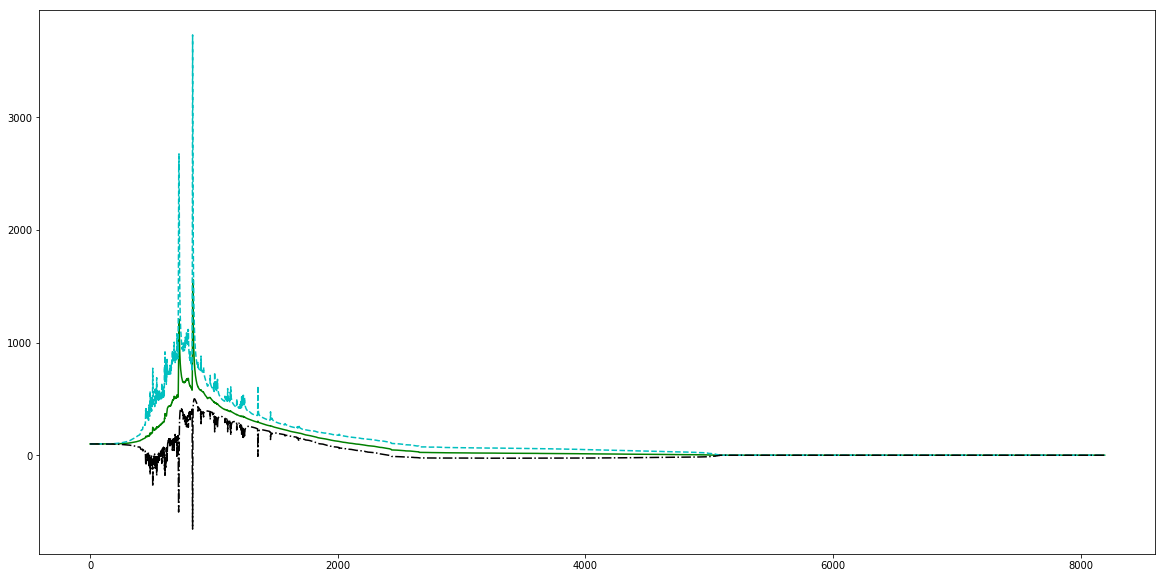

In [292]:
plt.figure(figsize=(20,10))
plt.plot(mean3, '-g')  # solid green
plt.plot(mean31, '--c') # dashed cyan
plt.plot(mean32, '-.k') # dashdot black

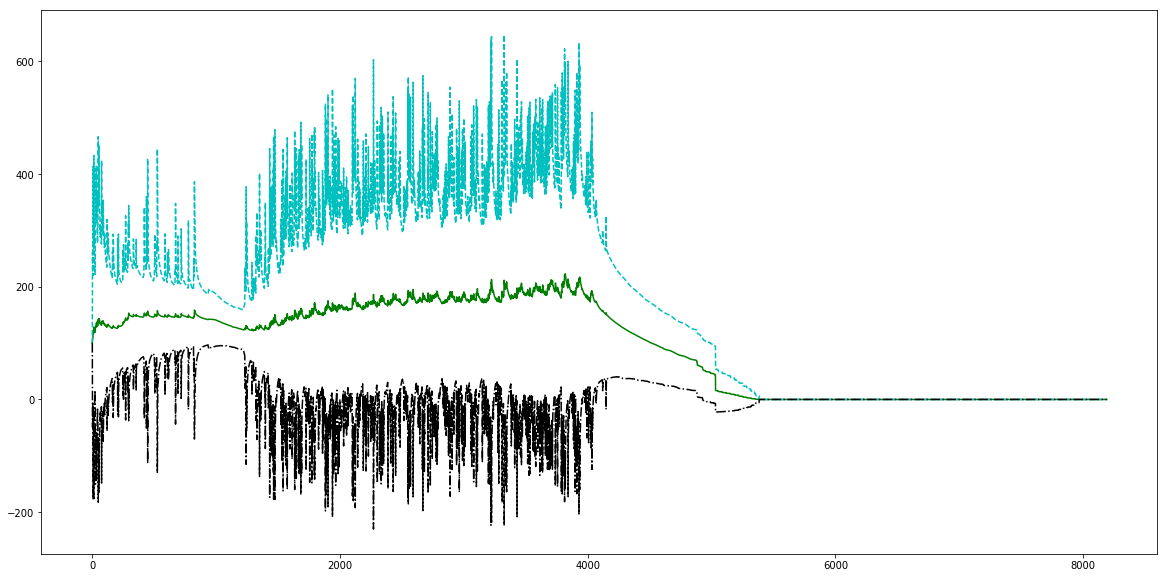

In [293]:
plt.figure(figsize=(20,10))
plt.plot(mean4, '-g')  # solid green
plt.plot(mean41, '--c') # dashed cyan
plt.plot(mean42, '-.k') # dashdot black

In [294]:
# Copying just the label values in a separate dataframe

labels_df['Labels(5clusters)'] = df['Labels2']
labels_df = pd.DataFrame(labels_df)
labels_df.shape

(13800, 2)

In [295]:
labels_df.to_csv('Newlabels(8192).csv')


In [296]:
labels_df.to_csv('Newlabels(8192).txt')


### Choosing number of clusters 10

In [71]:
# Number of clusters
kmeans = KMeans(n_clusters=10)
# Fitting the input data
kmeans = kmeans.fit(X_haar256)
# Getting the cluster labels
labels = kmeans.predict(X_haar256)
# Centroid values
centroids = kmeans.cluster_centers_

#Unique labels
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
zero=0
one=0
two=0
three=0
four=0
five=0
six=0
seven=0
eight=0
nine=0
for i in labels:
    if i==0:
        zero=zero+1
    elif i==1:
        one=one+1
    elif i==2:
        two=two+1
    elif i==3:
        three=three+1
    elif i==4:
        four=four+1
    elif i==5:
        five=five+1
    elif i==6:
        six=six+1
    elif i==7:
        seven=seven+1
    elif i==8:
        eight=eight+1
    elif i==9:
        nine=nine+1
    

In [75]:
print("Number of entries with 0 as the label :" , zero)
print("Number of entries with 1 as the label :" , one)
print("Number of entries with 2 as the label :" , two)
print("Number of entries with 3 as the label :" , three)
print("Number of entries with 4 as the label :" , four)
print("Number of entries with 5 as the label :" , five)
print("Number of entries with 6 as the label :" , six)
print("Number of entries with 7 as the label :" , seven)
print("Number of entries with 8 as the label :" , eight)
print("Number of entries with 9 as the label :" , nine)

Number of entries with 0 as the label : 4923
Number of entries with 1 as the label : 1620
Number of entries with 2 as the label : 467
Number of entries with 3 as the label : 2436
Number of entries with 4 as the label : 401
Number of entries with 5 as the label : 1493
Number of entries with 6 as the label : 433
Number of entries with 7 as the label : 1024
Number of entries with 8 as the label : 676
Number of entries with 9 as the label : 327


In [76]:
labels.shape

(13800,)

In [77]:
df=pd.DataFrame(X_narray)
df['Labels']=labels

In [78]:
df0 = df[df['Labels']==0] ### Labels with 0 in a dataframe
df0.shape
X_array0=df0.values
print(X_array0.shape)

df1 = df[df['Labels']==1] ### Labels with 1 in a dataframe
df1.shape
X_array1=df1.values
print(X_array1.shape)

df2 = df[df['Labels']==2] ### Labels with 2 in a dataframe
df2.shape
X_array2=df2.values
print(X_array2.shape)

df3 = df[df['Labels']==3] ### Labels with 3 in a dataframe
df3.shape
X_array3=df3.values
print(X_array3.shape)

df4 = df[df['Labels']==4] ### Labels with 4 in a dataframe
df4.shape
X_array4=df4.values
print(X_array4.shape)

df5 = df[df['Labels']==5] ### Labels with 5 in a dataframe
df5.shape
X_array5=df5.values
print(X_array5.shape)

df6 = df[df['Labels']==6] ### Labels with 6 in a dataframe
df6.shape
X_array6=df6.values
print(X_array6.shape)

df7 = df[df['Labels']==7] ### Labels with 7 in a dataframe
df7.shape
X_array7=df7.values
print(X_array7.shape)

df8 = df[df['Labels']==8] ### Labels with 8 in a dataframe
df8.shape
X_array8=df8.values
print(X_array8.shape)

df9 = df[df['Labels']==9] ### Labels with 9 in a dataframe
df9.shape
X_array9=df9.values
print(X_array9.shape)


(4923, 8193)
(1620, 8193)
(467, 8193)
(2436, 8193)
(401, 8193)
(1493, 8193)
(433, 8193)
(1024, 8193)
(676, 8193)
(327, 8193)


In [82]:
mean0=[]
max0=[]
min0=[]
mean1=[]
max1=[]
min1=[]
mean2=[]
max2=[]
min2=[]
mean3=[]
max3=[]
min3=[]
mean4=[]
max4=[]
min4=[]
mean5=[]
max5=[]
min5=[]
mean6=[]
max6=[]
min6=[]
mean7=[]
max7=[]
min7=[]
mean8=[]
max8=[]
min8=[]
mean9=[]
max9=[]
min9=[]

In [83]:
for i in range(0,8192):
    mean0.append(np.mean(X_array0[:,i]))   # Finding mean, max and min for cluster 0
    max0.append(max(X_array0[:,i]))
    min0.append(min(X_array0[:,i]))
    
    mean1.append(np.mean(X_array1[:,i]))   # Finding mean, max and min for cluster 1
    max1.append(max(X_array1[:,i]))
    min1.append(min(X_array1[:,i]))
    
    mean2.append(np.mean(X_array2[:,i]))   # Finding mean, max and min for cluster 2
    max2.append(max(X_array2[:,i]))
    min2.append(min(X_array2[:,i]))
    
    mean3.append(np.mean(X_array3[:,i]))   # Finding mean, max and min for cluster 3
    max3.append(max(X_array3[:,i]))
    min3.append(min(X_array3[:,i]))
    
    mean4.append(np.mean(X_array4[:,i]))   # Finding mean, max and min for cluster 4
    max4.append(max(X_array4[:,i]))
    min4.append(min(X_array4[:,i]))
    
    mean5.append(np.mean(X_array5[:,i]))   # Finding mean, max and min for cluster 5
    max5.append(max(X_array5[:,i]))
    min5.append(min(X_array5[:,i]))
    
    mean6.append(np.mean(X_array6[:,i]))   # Finding mean, max and min for cluster 6
    max6.append(max(X_array6[:,i]))
    min6.append(min(X_array6[:,i]))
    
    mean7.append(np.mean(X_array7[:,i]))   # Finding mean, max and min for cluster 7
    max7.append(max(X_array7[:,i]))
    min7.append(min(X_array7[:,i]))
    
    mean8.append(np.mean(X_array8[:,i]))   # Finding mean, max and min for cluster 8
    max8.append(max(X_array8[:,i]))
    min8.append(min(X_array8[:,i]))
    
    mean9.append(np.mean(X_array9[:,i]))   # Finding mean, max and min for cluster 9
    max9.append(max(X_array9[:,i]))
    min9.append(min(X_array9[:,i]))
        

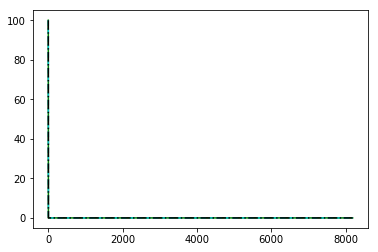

In [88]:
plt.plot(mean0, '-g')  # solid green
plt.plot(max0, '--c') # dashed cyan
plt.plot(min0, '-.k') # dashdot black

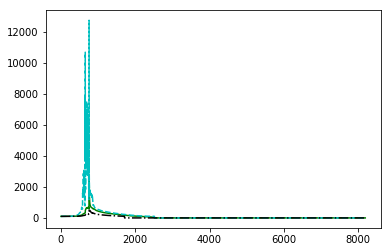

In [89]:
plt.plot(mean1, '-g')  # solid green
plt.plot(max1, '--c') # dashed cyan
plt.plot(min1, '-.k') # dashdot black

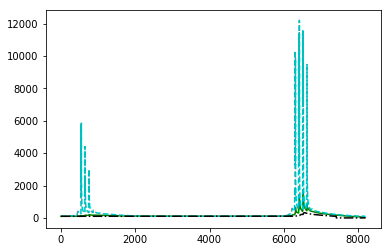

In [90]:
plt.plot(mean2, '-g')  # solid green
plt.plot(max2, '--c') # dashed cyan
plt.plot(min2, '-.k') # dashdot black

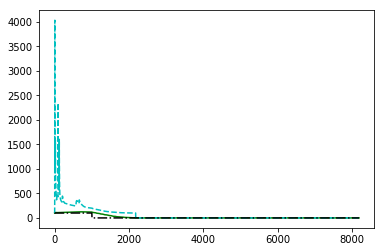

In [91]:
plt.plot(mean3, '-g')  # solid green
plt.plot(max3, '--c') # dashed cyan
plt.plot(min3, '-.k') # dashdot black

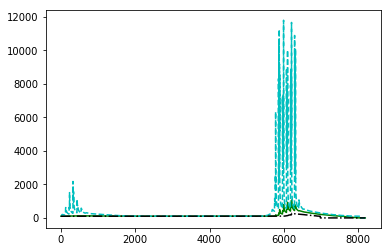

In [92]:
plt.plot(mean4, '-g')  # solid green
plt.plot(max4, '--c') # dashed cyan
plt.plot(min4, '-.k') # dashdot black

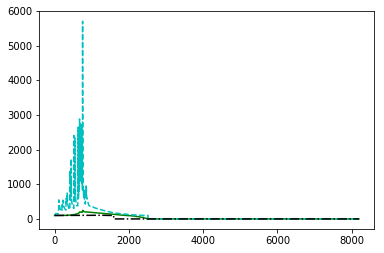

In [93]:
plt.plot(mean5, '-g')  # solid green
plt.plot(max5, '--c') # dashed cyan
plt.plot(min5, '-.k') # dashdot black

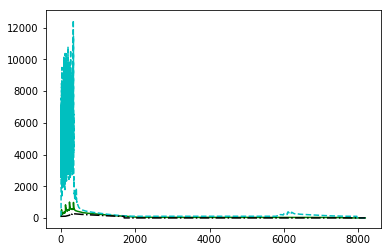

In [94]:
plt.plot(mean6, '-g')  # solid green
plt.plot(max6, '--c') # dashed cyan
plt.plot(min6, '-.k') # dashdot black

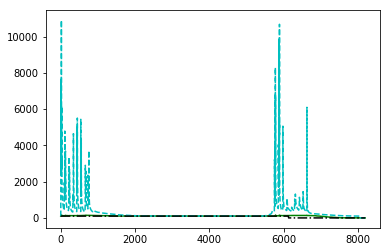

In [95]:
plt.plot(mean7, '-g')  # solid green
plt.plot(max7, '--c') # dashed cyan
plt.plot(min7, '-.k') # dashdot black

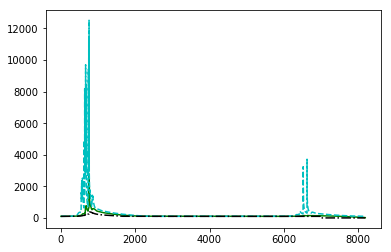

In [96]:
plt.plot(mean8, '-g')  # solid green
plt.plot(max8, '--c') # dashed cyan
plt.plot(min8, '-.k') # dashdot black

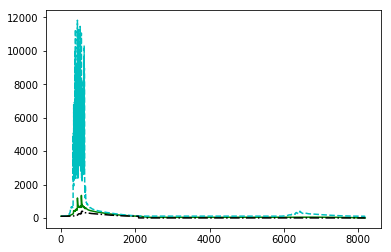

In [97]:
plt.plot(mean9, '-g')  # solid green
plt.plot(max9, '--c') # dashed cyan
plt.plot(min9, '-.k') # dashdot black

## Mini Batch K Means